In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160531)

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
n0, mu0, variance0 = 800, [10,11], 20
data0 = multivariate_normal(mu0,np.eye(2)*variance0, n0)
df0 = DataFrame(data0,columns=['x','y'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18,20], 22
data1 = multivariate_normal(mu1,np.eye(2)*variance1, n1)
df1 = DataFrame(data1,columns=['x','y'])
df1['t'] = 1

df = pd.concat([df0,df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set =df[:num_data]
test_set =df[num_data:]

In [3]:
train_x=train_set[['x','y']].as_matrix()
train_t=train_set['t'].as_matrix().reshape([len(train_set),1])
test_x=test_set[['x','y']].as_matrix()
test_t=test_set['t'].as_matrix().reshape([len(test_set),1])

In [4]:
x = tf.placeholder(tf.float32,[None ,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)

t = tf.placeholder(tf.float32, [None,1])
loss = -tf.reduce_sum(t*tf.log(p)+(1-t)*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))
accuracy= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
train_accurcy = []
test_accurcy = []
for _ in range (2500):
    sess.run(train_step,feed_dict={x:train_x,t:train_t})
    acc_val =sess.run(accuracy, feed_dict={x:train_x,t:train_t})
    train_accurcy.append(acc_val)
#     sess.run(train_step,feed_dict={x:train_x,t:train_t})
    acc_val =sess.run(accuracy, feed_dict={x:test_x,t:test_t})
    test_accurcy.append(acc_val)

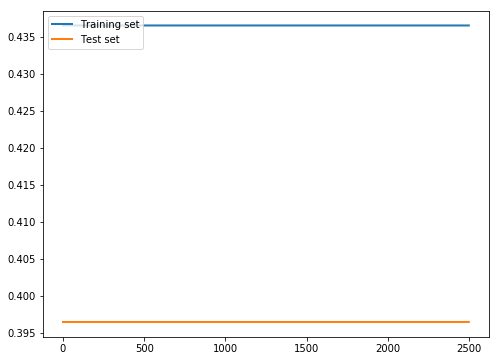

In [10]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range (len(train_accurcy)),train_accurcy,
             linewidth=2,label='Training set')
subplot.plot(range (len(test_accurcy)),test_accurcy,
             linewidth=2,label='Test set')
subplot.legend(loc='upper left')